In [109]:
# packages
import pandas as pd # for data processing
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /Users/ingridlewah/Desktop/Projects/MANGODEV/mangosplit/Netflix_project


In [111]:
netflix_data = pd.read_csv("dataset/cleaned_netflix_data.csv")

1. Netflix content release 
----

In [112]:
netflix_data_content = netflix_data.copy()

In [113]:
netflix_data_content['date_added'].value_counts()

date_added
January 1, 2020       119
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
February 19, 2016       1
January 23, 2016        1
January 22, 2016        1
January 8, 2016         1
September 25, 2021      1
Name: count, Length: 1767, dtype: int64

2. Content Preferences on Netflix: Movies vs. TV Shows
----
    What is the content release at netflix like ?
-----

In [114]:
# creating a copy of dataset so that will not affect our original dataset.
netflix_df = netflix_data.copy()

In [115]:
# GROUPBY()
netflix_df.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

In [12]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

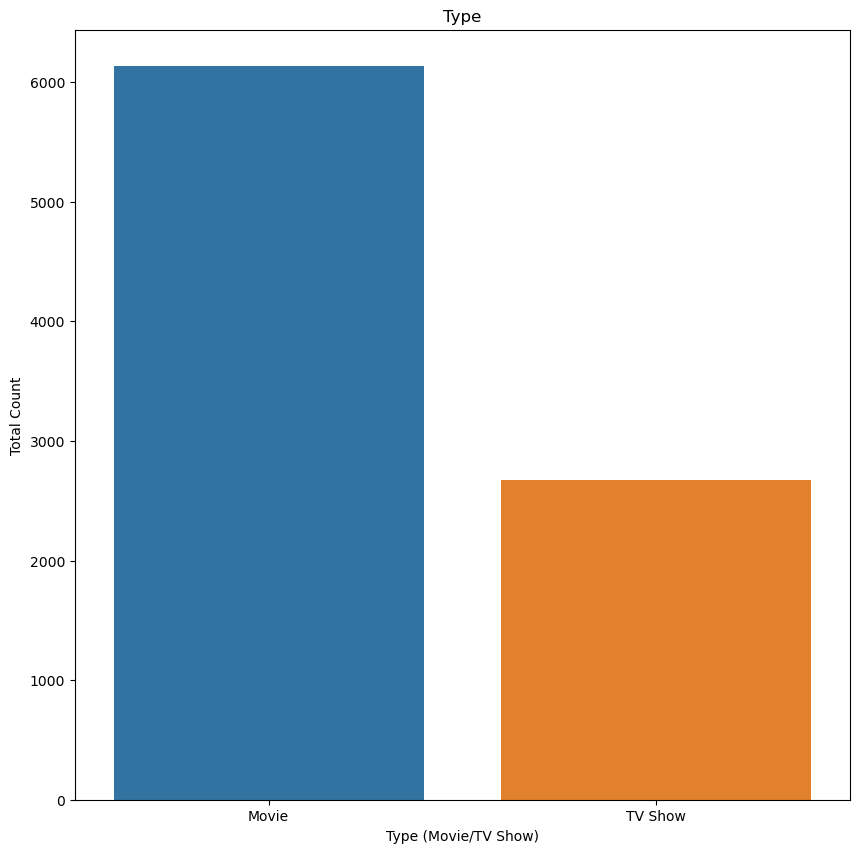

In [19]:
netflix_data_hist = netflix_df['type'].value_counts()

netflix_data_hist_df = pd.DataFrame({'type': netflix_data_hist.index, 'count': netflix_data_hist.values})

plt.figure(figsize=(10, 10))
sns.barplot(x='type', y='count', data=netflix_data_hist_df)
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.title('Type')
plt.show()

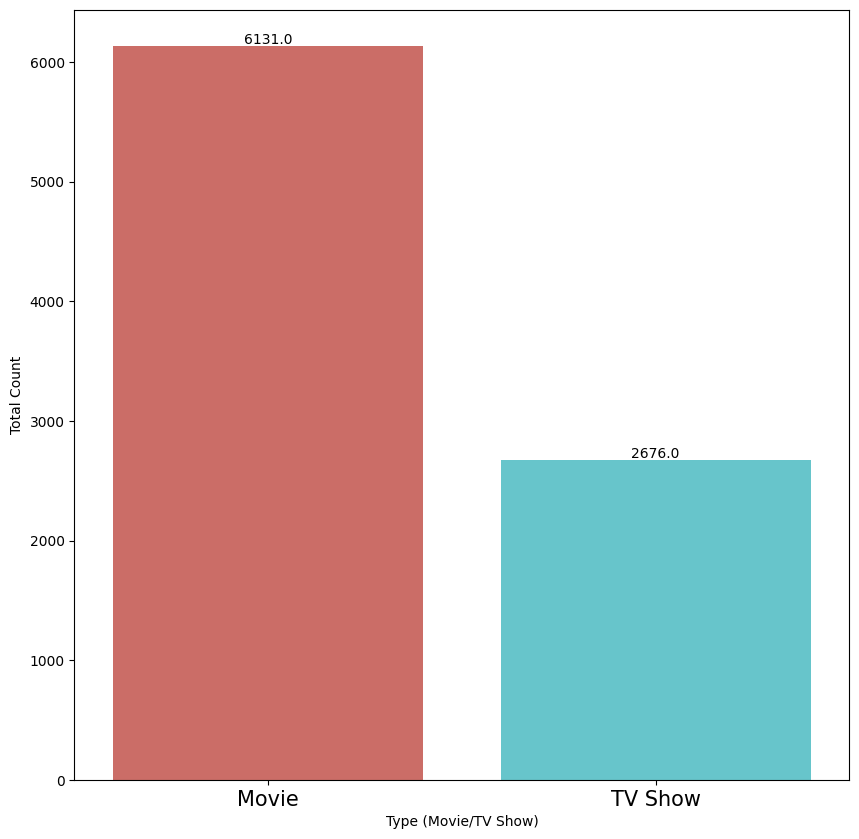

In [122]:
# SECOND WAY OF VISUALISATION 
plt.figure(figsize=(10, 10))
# graph = sns.countplot(x='type', data = netflix_df, palette = 'hls' )
graph = sns.countplot(x='type', hue='type', data=netflix_df, palette='hls', legend=False)
plt.xticks(fontsize = 15)
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2. , height + 20, height, ha = 'center', fontsize = 10 )

plt.show()

(-1.23464994868042,
 1.2346504795506437,
 -1.1953617900438445,
 1.1953632179088005)

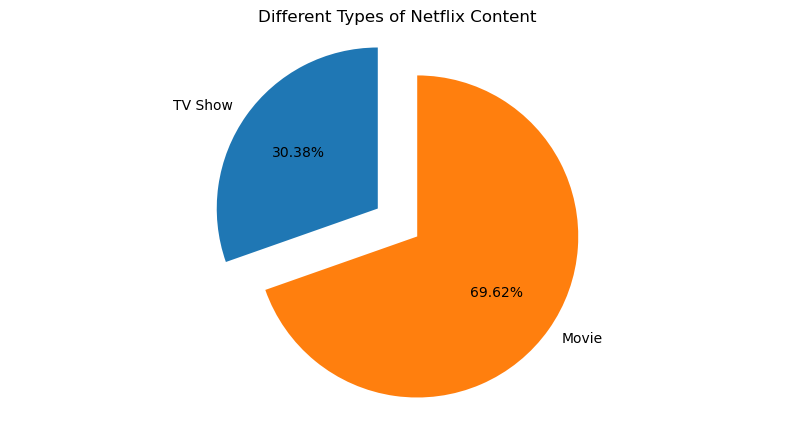

In [27]:
# PIE CHART
plt.figure(figsize=(10,5))
label=['TV Show', 'Movie']
plt.pie(netflix_df['type'].value_counts().sort_values(), 
        labels=label, 
        explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

SHOW THE NUMBER OF TV SHOWS AND MOVIES RELEASED IN EACH COUNTRY


In [98]:
# convert a column named 'country' to string data type:
netflix_data_content['country'] = netflix_data_content['country'].astype(str)

# Clean and normalize the 'country' column
netflix_data_content['country'] = netflix_data_content['country'].str.strip()

# split the 'country' column into a list of countries
netflix_data_content['country'] = netflix_data_content['country'].str.split(', ')

# netflix_data['country'] = netflix_data['country'].apply(lambda x: str(x).split(', '))

# Create a list to store all the countries
all_countries = []

# Iterate through each row and add the countries to the list
for countries in netflix_data_content['country']:
    all_countries.extend(countries)

# Create a DataFrame from the list of countries
countries_df = pd.DataFrame({'country': all_countries})

# Count the occurrences of each country
country_counts = countries_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Print the result
# print(country_counts)


# Create a DataFrame from the country counts
# country_counts_df = pd.DataFrame({'country': country_counts.index, 'count': country_counts.values})
country_counts_df = pd.DataFrame({'country': country_counts['country'], 'count': country_counts['count']})

# Export the DataFrame to a CSV file
country_counts_df.to_csv('country_counts_v2.csv', index=False)


In [106]:
# import file after cleaning 
netflix_country_data = pd.read_csv("dataset/country_counts_v2.csv")

In [3]:
import geopandas as gpd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


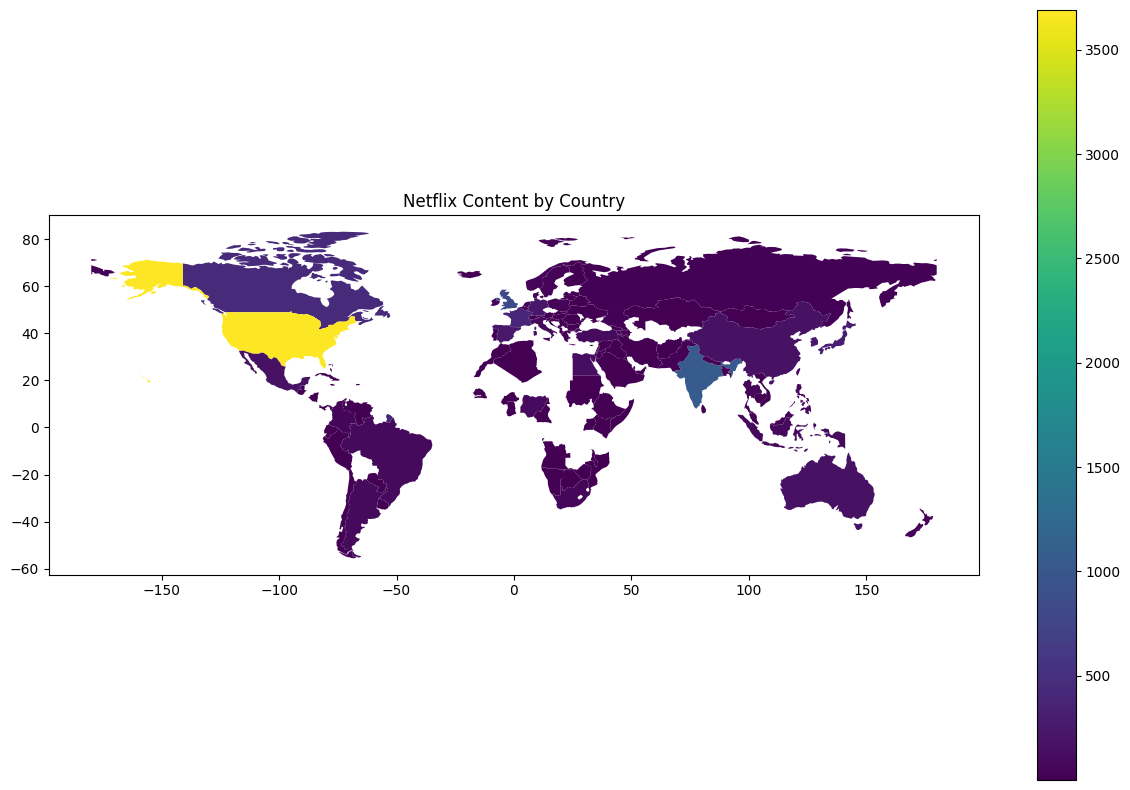

In [108]:

# Load the country geometries from a GeoJSON file
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check and ensure data types
# country_counts['count'] = country_counts['count'].astype(int)
netflix_country_data['count'] = netflix_country_data['count'].astype(int)

# Merge your country counts data with the country geometries
merged_data = world.merge(netflix_country_data, left_on='name', right_on='country', how='left')

# Visualize the data on a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='count', cmap='viridis', linewidth=0.8, ax=ax, legend=True)

plt.title('Netflix Content by Country')
plt.show()

3. Netflix visualisation of the rating of shows and movies

Ratings is explored, most Movies & TV Shows are rated as TV-MA. That means most programs on Nefltix are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.

------

In [21]:
netflix_df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2161
TV-PG        862
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           289
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

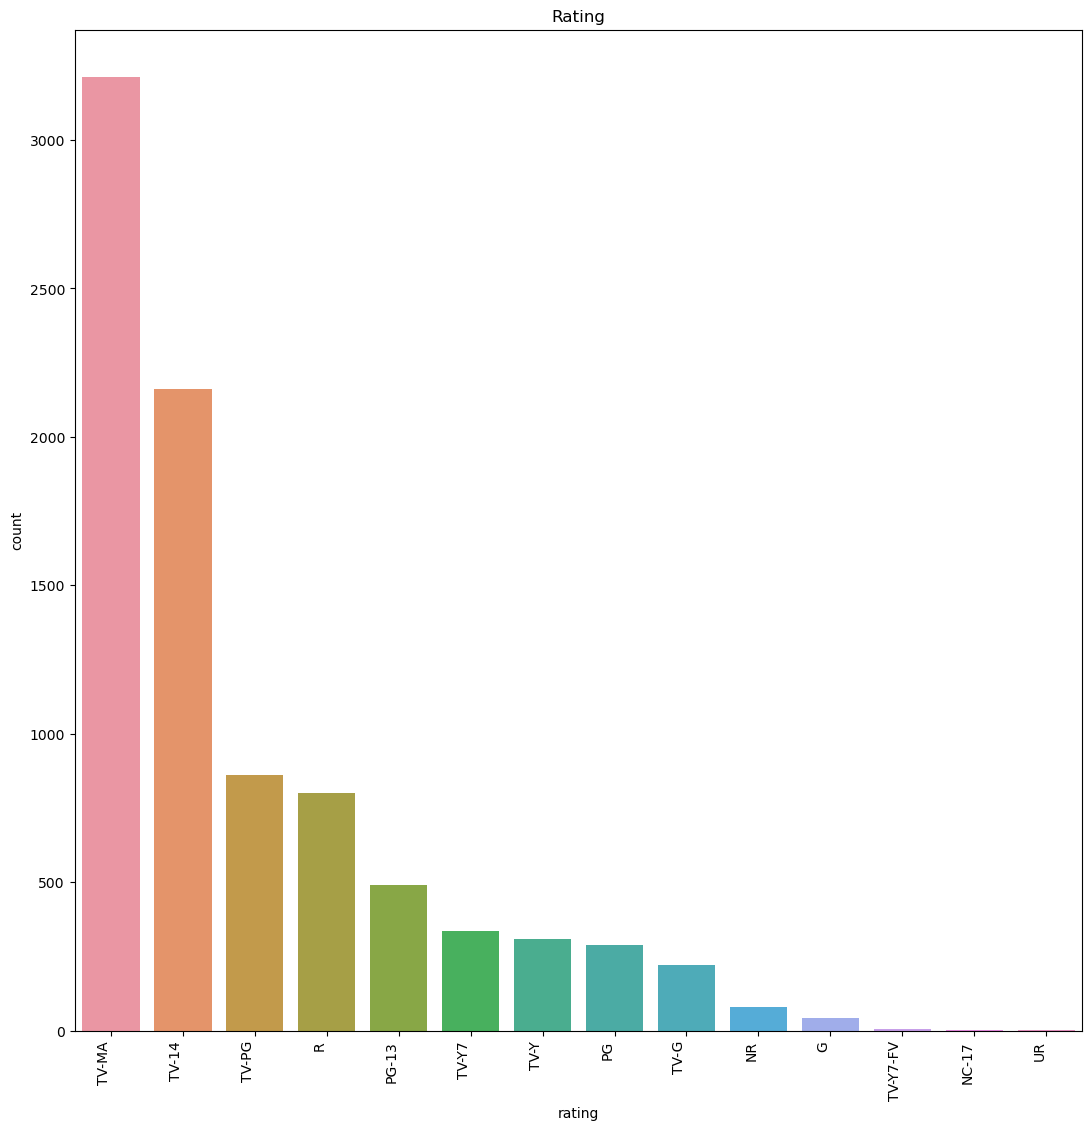

In [23]:
# Create a count plot for the 'rating' column
plt.figure(figsize=(13, 13))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.title('Rating')
plt.xticks(rotation=90, ha="right")

plt.show()

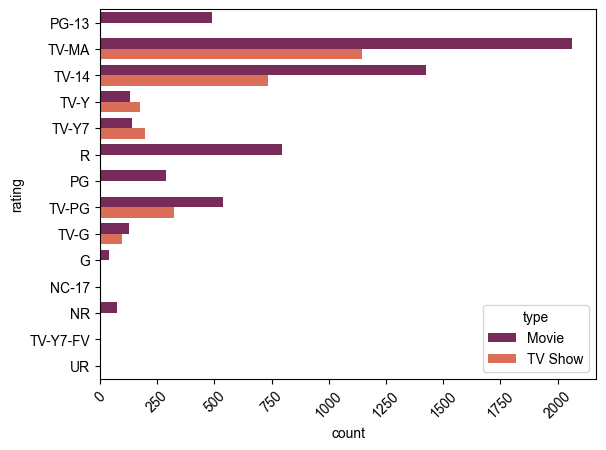

In [123]:
df2 = netflix_df[['type', 'rating']]
sns.countplot(y = 'rating', hue = 'type', data=df2, palette = "rocket")
sns.set_style("whitegrid")
plt.xticks(rotation=45);